In [55]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

from tensorflow.keras.models import Sequential
import pandas as pd
from io import BytesIO
import PIL
from PIL import Image, ImageFile

In [37]:
splitfolders.ratio('Data/train', output="output", seed=1337, ratio=(0.8, 0.2,0)) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  3.30 files/s]
Copying files: 4 files [00:00, 11.81 files/s]
Copying files: 16 files [00:00, 44.74 files/s]
Copying files: 27 files [00:00, 64.08 files/s]
Copying files: 39 files [00:00, 80.82 files/s]
Copying files: 49 files [00:00, 84.31 files/s]
Copying files: 59 files [00:00, 88.59 files/s]
Copying files: 69 files [00:01, 91.50 files/s]
Copying files: 80 files [00:01, 95.64 files/s]
Copying files: 92 files [00:01, 102.79 files/s]
Copying files: 103 files [00:01, 104.66 files/s]
Copying files: 114 files [00:01, 105.83 files/s]
Copying files: 127 files [00:01, 111.65 files/s]
Copying files: 139 files [00:01, 111.79 files/s]
Copying files: 151 files [00:01, 112.90 files/s]
Copying files: 163 files [00:01, 112.36 files/s]
Copying files: 175 files [00:01, 108.55 files/s]
Copying files: 186 files [00:02, 104.91 files/s]
Copying files: 198 files [00:02, 108.71 files/s]
Copying files: 211 files [00:02, 113.22 files/s

Copying files: 1824 files [00:17, 116.40 files/s]
Copying files: 1836 files [00:17, 111.19 files/s]
Copying files: 1848 files [00:18, 101.44 files/s]
Copying files: 1861 files [00:18, 107.44 files/s]
Copying files: 1875 files [00:18, 115.47 files/s]
Copying files: 1888 files [00:18, 118.68 files/s]
Copying files: 1902 files [00:18, 123.27 files/s]
Copying files: 1915 files [00:18, 123.37 files/s]
Copying files: 1928 files [00:18, 123.86 files/s]
Copying files: 1942 files [00:18, 127.41 files/s]
Copying files: 1955 files [00:18, 123.09 files/s]
Copying files: 1968 files [00:19, 121.19 files/s]
Copying files: 1981 files [00:19, 119.07 files/s]
Copying files: 1995 files [00:19, 124.23 files/s]
Copying files: 2008 files [00:19, 123.52 files/s]
Copying files: 2022 files [00:19, 126.63 files/s]
Copying files: 2035 files [00:19, 126.73 files/s]
Copying files: 2048 files [00:19, 123.62 files/s]
Copying files: 2062 files [00:19, 125.88 files/s]
Copying files: 2075 files [00:19, 122.37 files/s]


Copying files: 3875 files [00:34, 130.09 files/s]
Copying files: 3889 files [00:34, 125.53 files/s]
Copying files: 3902 files [00:34, 120.64 files/s]
Copying files: 3915 files [00:35, 115.65 files/s]
Copying files: 3928 files [00:35, 117.40 files/s]
Copying files: 3940 files [00:35, 117.53 files/s]
Copying files: 3952 files [00:35, 118.13 files/s]
Copying files: 3965 files [00:35, 120.04 files/s]
Copying files: 3978 files [00:35, 122.72 files/s]
Copying files: 3992 files [00:35, 127.58 files/s]
Copying files: 4005 files [00:35, 127.97 files/s]
Copying files: 4018 files [00:35, 127.97 files/s]
Copying files: 4031 files [00:36, 123.10 files/s]
Copying files: 4044 files [00:36, 122.72 files/s]
Copying files: 4057 files [00:36, 120.08 files/s]
Copying files: 4071 files [00:36, 125.39 files/s]
Copying files: 4085 files [00:36, 127.64 files/s]
Copying files: 4098 files [00:36, 128.29 files/s]
Copying files: 4112 files [00:36, 131.23 files/s]
Copying files: 4126 files [00:36, 130.32 files/s]


Copying files: 5960 files [00:51, 125.30 files/s]
Copying files: 5974 files [00:51, 127.48 files/s]
Copying files: 5987 files [00:51, 127.48 files/s]
Copying files: 6000 files [00:52, 121.30 files/s]
Copying files: 6013 files [00:52, 118.64 files/s]
Copying files: 6025 files [00:52, 117.84 files/s]
Copying files: 6039 files [00:52, 123.60 files/s]
Copying files: 6053 files [00:52, 127.54 files/s]
Copying files: 6066 files [00:52, 125.60 files/s]
Copying files: 6079 files [00:52, 126.60 files/s]
Copying files: 6093 files [00:52, 129.91 files/s]
Copying files: 6107 files [00:52, 131.75 files/s]
Copying files: 6121 files [00:53, 130.01 files/s]
Copying files: 6135 files [00:53, 125.12 files/s]
Copying files: 6148 files [00:53, 119.26 files/s]
Copying files: 6162 files [00:53, 122.14 files/s]
Copying files: 6175 files [00:53, 123.51 files/s]
Copying files: 6189 files [00:53, 125.81 files/s]
Copying files: 6203 files [00:53, 128.49 files/s]
Copying files: 6217 files [00:53, 131.45 files/s]


Copying files: 7984 files [01:08, 126.29 files/s]
Copying files: 7998 files [01:08, 129.19 files/s]
Copying files: 8011 files [01:08, 128.75 files/s]
Copying files: 8024 files [01:09, 128.58 files/s]
Copying files: 8037 files [01:09, 124.56 files/s]
Copying files: 8050 files [01:09, 119.51 files/s]
Copying files: 8063 files [01:09, 119.45 files/s]
Copying files: 8076 files [01:09, 120.28 files/s]
Copying files: 8089 files [01:09, 118.12 files/s]
Copying files: 8102 files [01:09, 120.11 files/s]
Copying files: 8116 files [01:09, 124.10 files/s]
Copying files: 8129 files [01:09, 123.87 files/s]
Copying files: 8142 files [01:10, 121.28 files/s]
Copying files: 8155 files [01:10, 115.37 files/s]
Copying files: 8167 files [01:10, 114.84 files/s]
Copying files: 8181 files [01:10, 119.85 files/s]
Copying files: 8195 files [01:10, 123.62 files/s]
Copying files: 8209 files [01:10, 124.99 files/s]
Copying files: 8222 files [01:10, 122.16 files/s]
Copying files: 8235 files [01:10, 120.76 files/s]


Copying files: 9937 files [01:27, 51.72 files/s]
Copying files: 9945 files [01:27, 55.34 files/s]
Copying files: 9956 files [01:27, 66.46 files/s]
Copying files: 9965 files [01:27, 64.22 files/s]
Copying files: 9973 files [01:27, 61.91 files/s]
Copying files: 9982 files [01:27, 67.69 files/s]
Copying files: 9995 files [01:28, 82.32 files/s]
Copying files: 10008 files [01:28, 93.40 files/s]
Copying files: 10022 files [01:28, 104.55 files/s]
Copying files: 10035 files [01:28, 110.06 files/s]
Copying files: 10047 files [01:28, 110.71 files/s]
Copying files: 10059 files [01:28, 107.58 files/s]
Copying files: 10071 files [01:28, 104.48 files/s]
Copying files: 10084 files [01:28, 109.25 files/s]
Copying files: 10097 files [01:28, 112.97 files/s]
Copying files: 10111 files [01:29, 118.91 files/s]
Copying files: 10125 files [01:29, 123.97 files/s]
Copying files: 10139 files [01:29, 126.40 files/s]
Copying files: 10152 files [01:29, 124.86 files/s]
Copying files: 10165 files [01:29, 125.68 file

Copying files: 11675 files [01:45, 89.61 files/s]
Copying files: 11685 files [01:45, 84.97 files/s]
Copying files: 11694 files [01:45, 84.41 files/s]
Copying files: 11703 files [01:45, 82.74 files/s]
Copying files: 11712 files [01:45, 82.04 files/s]
Copying files: 11721 files [01:45, 79.39 files/s]
Copying files: 11730 files [01:46, 76.99 files/s]
Copying files: 11738 files [01:46, 77.53 files/s]
Copying files: 11746 files [01:46, 77.97 files/s]
Copying files: 11754 files [01:46, 73.97 files/s]
Copying files: 11762 files [01:46, 74.80 files/s]
Copying files: 11770 files [01:46, 75.88 files/s]
Copying files: 11778 files [01:46, 75.19 files/s]
Copying files: 11786 files [01:46, 75.97 files/s]
Copying files: 11794 files [01:46, 74.98 files/s]
Copying files: 11802 files [01:47, 71.02 files/s]
Copying files: 11810 files [01:47, 68.39 files/s]
Copying files: 11818 files [01:47, 70.97 files/s]
Copying files: 11826 files [01:47, 67.41 files/s]
Copying files: 11834 files [01:47, 68.62 files/s]


Copying files: 13372 files [02:04, 89.89 files/s]
Copying files: 13382 files [02:04, 79.51 files/s]
Copying files: 13391 files [02:05, 81.65 files/s]
Copying files: 13400 files [02:05, 80.60 files/s]
Copying files: 13409 files [02:05, 77.65 files/s]
Copying files: 13418 files [02:05, 77.89 files/s]
Copying files: 13426 files [02:05, 76.77 files/s]
Copying files: 13435 files [02:05, 78.92 files/s]
Copying files: 13444 files [02:05, 79.72 files/s]
Copying files: 13453 files [02:05, 81.50 files/s]
Copying files: 13462 files [02:05, 81.22 files/s]
Copying files: 13471 files [02:06, 82.13 files/s]
Copying files: 13480 files [02:06, 81.88 files/s]
Copying files: 13489 files [02:06, 80.18 files/s]
Copying files: 13500 files [02:06, 87.96 files/s]
Copying files: 13512 files [02:06, 95.67 files/s]
Copying files: 13524 files [02:06, 101.53 files/s]
Copying files: 13536 files [02:06, 106.61 files/s]
Copying files: 13548 files [02:06, 109.76 files/s]
Copying files: 13560 files [02:06, 107.96 files

Copying files: 15086 files [02:23, 113.74 files/s]
Copying files: 15099 files [02:23, 118.30 files/s]
Copying files: 15113 files [02:23, 122.73 files/s]
Copying files: 15126 files [02:23, 115.30 files/s]
Copying files: 15138 files [02:24, 106.86 files/s]
Copying files: 15151 files [02:24, 111.51 files/s]
Copying files: 15165 files [02:24, 118.47 files/s]
Copying files: 15178 files [02:24, 121.58 files/s]
Copying files: 15192 files [02:24, 126.26 files/s]
Copying files: 15206 files [02:24, 127.42 files/s]
Copying files: 15220 files [02:24, 129.54 files/s]
Copying files: 15234 files [02:24, 130.96 files/s]
Copying files: 15248 files [02:24, 125.86 files/s]
Copying files: 15261 files [02:25, 114.57 files/s]
Copying files: 15275 files [02:25, 119.46 files/s]
Copying files: 15289 files [02:25, 123.89 files/s]
Copying files: 15302 files [02:25, 71.24 files/s] 
Copying files: 15316 files [02:25, 83.36 files/s]
Copying files: 15329 files [02:25, 92.30 files/s]
Copying files: 15341 files [02:25

Copying files: 16890 files [02:41, 89.21 files/s]
Copying files: 16899 files [02:41, 88.39 files/s]
Copying files: 16909 files [02:41, 89.98 files/s]
Copying files: 16920 files [02:41, 94.91 files/s]
Copying files: 16931 files [02:41, 99.19 files/s]
Copying files: 16942 files [02:41, 101.97 files/s]
Copying files: 16953 files [02:41, 95.59 files/s] 
Copying files: 16964 files [02:42, 98.43 files/s]
Copying files: 16976 files [02:42, 102.28 files/s]
Copying files: 16989 files [02:42, 109.00 files/s]
Copying files: 17001 files [02:42, 80.56 files/s] 
Copying files: 17015 files [02:42, 92.63 files/s]
Copying files: 17028 files [02:42, 100.79 files/s]
Copying files: 17042 files [02:42, 109.64 files/s]
Copying files: 17055 files [02:42, 114.35 files/s]
Copying files: 17068 files [02:43, 113.16 files/s]
Copying files: 17080 files [02:43, 112.53 files/s]
Copying files: 17093 files [02:43, 116.84 files/s]
Copying files: 17108 files [02:43, 124.04 files/s]
Copying files: 17122 files [02:43, 127

Copying files: 18756 files [02:58, 87.60 files/s]
Copying files: 18767 files [02:58, 91.63 files/s]
Copying files: 18778 files [02:58, 95.11 files/s]
Copying files: 18789 files [02:59, 92.67 files/s]
Copying files: 18802 files [02:59, 100.59 files/s]
Copying files: 18813 files [02:59, 102.12 files/s]
Copying files: 18824 files [02:59, 100.21 files/s]
Copying files: 18835 files [02:59, 100.23 files/s]
Copying files: 18847 files [02:59, 105.25 files/s]
Copying files: 18859 files [02:59, 108.83 files/s]
Copying files: 18872 files [02:59, 112.36 files/s]
Copying files: 18886 files [02:59, 119.51 files/s]
Copying files: 18899 files [02:59, 118.56 files/s]
Copying files: 18911 files [03:00, 110.56 files/s]
Copying files: 18923 files [03:00, 107.35 files/s]
Copying files: 18934 files [03:00, 101.44 files/s]
Copying files: 18945 files [03:00, 101.50 files/s]
Copying files: 18956 files [03:00, 100.34 files/s]
Copying files: 18967 files [03:00, 99.01 files/s] 
Copying files: 18977 files [03:00, 

Copying files: 20628 files [03:15, 128.29 files/s]
Copying files: 20641 files [03:15, 126.17 files/s]
Copying files: 20655 files [03:16, 128.18 files/s]
Copying files: 20669 files [03:16, 130.39 files/s]
Copying files: 20683 files [03:16, 125.12 files/s]
Copying files: 20696 files [03:16, 111.33 files/s]
Copying files: 20708 files [03:16, 100.69 files/s]
Copying files: 20719 files [03:16, 98.90 files/s] 
Copying files: 20730 files [03:16, 94.67 files/s]
Copying files: 20740 files [03:16, 93.95 files/s]
Copying files: 20750 files [03:17, 94.73 files/s]
Copying files: 20761 files [03:17, 96.58 files/s]
Copying files: 20771 files [03:17, 92.29 files/s]
Copying files: 20781 files [03:17, 94.19 files/s]
Copying files: 20791 files [03:17, 94.31 files/s]
Copying files: 20803 files [03:17, 100.12 files/s]
Copying files: 20817 files [03:17, 110.79 files/s]
Copying files: 20829 files [03:17, 102.62 files/s]
Copying files: 20841 files [03:17, 106.21 files/s]
Copying files: 20852 files [03:18, 102

Copying files: 22461 files [03:33, 105.34 files/s]
Copying files: 22473 files [03:33, 107.61 files/s]
Copying files: 22485 files [03:33, 108.11 files/s]
Copying files: 22497 files [03:33, 109.05 files/s]
Copying files: 22509 files [03:33, 110.01 files/s]
Copying files: 22521 files [03:33, 108.60 files/s]
Copying files: 22535 files [03:33, 115.85 files/s]
Copying files: 22548 files [03:34, 119.14 files/s]
Copying files: 22562 files [03:34, 123.65 files/s]
Copying files: 22576 files [03:34, 127.32 files/s]
Copying files: 22589 files [03:34, 126.85 files/s]
Copying files: 22602 files [03:34, 123.62 files/s]
Copying files: 22615 files [03:34, 119.73 files/s]
Copying files: 22628 files [03:34, 96.62 files/s] 
Copying files: 22640 files [03:34, 101.58 files/s]
Copying files: 22653 files [03:34, 108.37 files/s]
Copying files: 22666 files [03:35, 113.34 files/s]
Copying files: 22679 files [03:35, 117.13 files/s]
Copying files: 22693 files [03:35, 123.13 files/s]
Copying files: 22706 files [03:

Copying files: 24261 files [03:50, 99.83 files/s] 
Copying files: 24272 files [03:51, 96.10 files/s]
Copying files: 24282 files [03:51, 95.17 files/s]
Copying files: 24294 files [03:51, 100.91 files/s]
Copying files: 24307 files [03:51, 107.36 files/s]
Copying files: 24319 files [03:51, 110.79 files/s]
Copying files: 24333 files [03:51, 117.16 files/s]
Copying files: 24347 files [03:51, 121.98 files/s]
Copying files: 24360 files [03:51, 123.30 files/s]
Copying files: 24373 files [03:51, 118.89 files/s]
Copying files: 24385 files [03:52, 118.62 files/s]
Copying files: 24397 files [03:52, 117.21 files/s]
Copying files: 24411 files [03:52, 121.99 files/s]
Copying files: 24424 files [03:52, 123.38 files/s]
Copying files: 24438 files [03:52, 125.65 files/s]
Copying files: 24451 files [03:52, 107.03 files/s]
Copying files: 24464 files [03:52, 111.78 files/s]
Copying files: 24478 files [03:52, 117.19 files/s]
Copying files: 24491 files [03:52, 112.72 files/s]
Copying files: 24503 files [03:53

Copying files: 26171 files [04:08, 95.20 files/s] 
Copying files: 26181 files [04:08, 95.87 files/s]
Copying files: 26191 files [04:08, 88.40 files/s]
Copying files: 26202 files [04:08, 92.46 files/s]
Copying files: 26212 files [04:08, 93.29 files/s]
Copying files: 26223 files [04:08, 96.33 files/s]
Copying files: 26233 files [04:08, 96.07 files/s]
Copying files: 26245 files [04:09, 102.15 files/s]
Copying files: 26256 files [04:09, 101.43 files/s]
Copying files: 26267 files [04:09, 103.06 files/s]
Copying files: 26281 files [04:09, 111.95 files/s]
Copying files: 26294 files [04:09, 116.51 files/s]
Copying files: 26308 files [04:09, 123.26 files/s]
Copying files: 26321 files [04:09, 124.96 files/s]
Copying files: 26334 files [04:09, 122.50 files/s]
Copying files: 26347 files [04:09, 123.81 files/s]
Copying files: 26360 files [04:10, 118.59 files/s]
Copying files: 26372 files [04:10, 111.54 files/s]
Copying files: 26384 files [04:10, 103.99 files/s]
Copying files: 26395 files [04:10, 10

Copying files: 28015 files [04:25, 110.94 files/s]
Copying files: 28029 files [04:25, 117.57 files/s]
Copying files: 28042 files [04:25, 120.34 files/s]
Copying files: 28055 files [04:25, 122.86 files/s]
Copying files: 28069 files [04:25, 126.29 files/s]
Copying files: 28082 files [04:25, 125.07 files/s]
Copying files: 28096 files [04:26, 128.31 files/s]
Copying files: 28109 files [04:26, 128.44 files/s]
Copying files: 28122 files [04:26, 122.62 files/s]
Copying files: 28135 files [04:26, 118.75 files/s]
Copying files: 28147 files [04:26, 118.95 files/s]
Copying files: 28159 files [04:26, 112.94 files/s]
Copying files: 28171 files [04:26, 102.80 files/s]
Copying files: 28182 files [04:26, 98.69 files/s] 
Copying files: 28193 files [04:26, 95.37 files/s]
Copying files: 28204 files [04:27, 97.42 files/s]
Copying files: 28214 files [04:27, 96.25 files/s]
Copying files: 28224 files [04:27, 93.41 files/s]
Copying files: 28234 files [04:27, 89.90 files/s]
Copying files: 28245 files [04:27, 9

Copying files: 29857 files [04:42, 116.84 files/s]
Copying files: 29870 files [04:42, 119.90 files/s]
Copying files: 29883 files [04:42, 119.71 files/s]
Copying files: 29895 files [04:42, 114.33 files/s]
Copying files: 29907 files [04:43, 82.36 files/s] 
Copying files: 29918 files [04:43, 86.81 files/s]
Copying files: 29928 files [04:43, 88.32 files/s]
Copying files: 29938 files [04:43, 73.26 files/s]
Copying files: 29952 files [04:43, 87.35 files/s]
Copying files: 29964 files [04:43, 94.49 files/s]
Copying files: 29976 files [04:43, 100.80 files/s]
Copying files: 29987 files [04:43, 103.20 files/s]
Copying files: 30001 files [04:44, 111.70 files/s]
Copying files: 30015 files [04:44, 118.21 files/s]
Copying files: 30028 files [04:44, 118.95 files/s]
Copying files: 30041 files [04:44, 115.63 files/s]
Copying files: 30053 files [04:44, 108.56 files/s]
Copying files: 30066 files [04:44, 114.25 files/s]
Copying files: 30078 files [04:44, 113.29 files/s]
Copying files: 30091 files [04:44, 1

Copying files: 31645 files [04:59, 122.12 files/s]
Copying files: 31658 files [05:00, 123.07 files/s]
Copying files: 31671 files [05:00, 124.69 files/s]
Copying files: 31684 files [05:00, 122.99 files/s]
Copying files: 31697 files [05:00, 119.93 files/s]
Copying files: 31710 files [05:00, 118.84 files/s]
Copying files: 31722 files [05:00, 118.68 files/s]
Copying files: 31736 files [05:00, 121.04 files/s]
Copying files: 31750 files [05:00, 124.34 files/s]
Copying files: 31764 files [05:00, 126.36 files/s]
Copying files: 31777 files [05:01, 125.89 files/s]
Copying files: 31790 files [05:01, 126.10 files/s]
Copying files: 31803 files [05:01, 126.96 files/s]
Copying files: 31816 files [05:01, 124.74 files/s]
Copying files: 31829 files [05:01, 121.75 files/s]
Copying files: 31842 files [05:01, 119.74 files/s]
Copying files: 31856 files [05:01, 123.64 files/s]
Copying files: 31870 files [05:01, 128.23 files/s]
Copying files: 31884 files [05:01, 131.05 files/s]
Copying files: 31898 files [05:

Copying files: 33726 files [05:16, 125.06 files/s]
Copying files: 33739 files [05:16, 118.94 files/s]
Copying files: 33752 files [05:17, 121.56 files/s]
Copying files: 33766 files [05:17, 125.64 files/s]
Copying files: 33780 files [05:17, 128.48 files/s]
Copying files: 33793 files [05:17, 128.38 files/s]
Copying files: 33806 files [05:17, 123.08 files/s]
Copying files: 33819 files [05:17, 117.16 files/s]
Copying files: 33832 files [05:17, 119.50 files/s]
Copying files: 33847 files [05:17, 127.17 files/s]
Copying files: 33862 files [05:17, 132.05 files/s]
Copying files: 33877 files [05:18, 135.78 files/s]
Copying files: 33892 files [05:18, 137.55 files/s]
Copying files: 33907 files [05:18, 138.32 files/s]
Copying files: 33921 files [05:18, 137.68 files/s]
Copying files: 33935 files [05:18, 129.10 files/s]
Copying files: 33949 files [05:18, 124.30 files/s]
Copying files: 33962 files [05:18, 123.88 files/s]
Copying files: 33977 files [05:18, 130.51 files/s]
Copying files: 33991 files [05:

Copying files: 35917 files [05:33, 134.13 files/s]
Copying files: 35933 files [05:33, 139.12 files/s]
Copying files: 35948 files [05:33, 141.32 files/s]
Copying files: 35964 files [05:34, 143.74 files/s]
Copying files: 35979 files [05:34, 144.07 files/s]
Copying files: 35994 files [05:34, 145.15 files/s]
Copying files: 36009 files [05:34, 146.10 files/s]
Copying files: 36024 files [05:34, 139.10 files/s]
Copying files: 36038 files [05:34, 130.26 files/s]
Copying files: 36052 files [05:34, 131.67 files/s]
Copying files: 36067 files [05:34, 136.24 files/s]
Copying files: 36082 files [05:34, 137.94 files/s]
Copying files: 36097 files [05:34, 137.86 files/s]
Copying files: 36113 files [05:35, 141.80 files/s]
Copying files: 36128 files [05:35, 143.97 files/s]
Copying files: 36143 files [05:35, 144.80 files/s]
Copying files: 36158 files [05:35, 142.55 files/s]
Copying files: 36173 files [05:35, 132.41 files/s]
Copying files: 36187 files [05:35, 128.95 files/s]
Copying files: 36202 files [05:

Copying files: 38054 files [05:50, 114.94 files/s]
Copying files: 38067 files [05:50, 118.45 files/s]
Copying files: 38081 files [05:51, 122.45 files/s]
Copying files: 38094 files [05:51, 114.14 files/s]
Copying files: 38106 files [05:51, 114.19 files/s]
Copying files: 38119 files [05:51, 116.50 files/s]
Copying files: 38132 files [05:51, 117.73 files/s]
Copying files: 38144 files [05:51, 116.82 files/s]
Copying files: 38156 files [05:51, 116.00 files/s]
Copying files: 38168 files [05:51, 102.75 files/s]
Copying files: 38182 files [05:52, 112.39 files/s]
Copying files: 38195 files [05:52, 115.75 files/s]
Copying files: 38210 files [05:52, 123.26 files/s]
Copying files: 38223 files [05:52, 123.85 files/s]
Copying files: 38236 files [05:52, 118.80 files/s]
Copying files: 38249 files [05:52, 111.78 files/s]
Copying files: 38262 files [05:52, 115.18 files/s]
Copying files: 38274 files [05:52, 111.90 files/s]
Copying files: 38289 files [05:52, 121.09 files/s]
Copying files: 38303 files [05:

Copying files: 39853 files [06:10, 24.46 files/s]
Copying files: 39860 files [06:10, 26.71 files/s]
Copying files: 39869 files [06:11, 34.43 files/s]
Copying files: 39881 files [06:11, 46.86 files/s]
Copying files: 39893 files [06:11, 59.03 files/s]
Copying files: 39906 files [06:11, 72.66 files/s]
Copying files: 39920 files [06:11, 86.78 files/s]
Copying files: 39933 files [06:11, 96.50 files/s]
Copying files: 39946 files [06:11, 104.07 files/s]
Copying files: 39958 files [06:11, 104.50 files/s]
Copying files: 39970 files [06:11, 102.96 files/s]
Copying files: 39982 files [06:12, 98.67 files/s] 
Copying files: 39994 files [06:12, 102.73 files/s]
Copying files: 40006 files [06:12, 106.28 files/s]
Copying files: 40019 files [06:12, 111.88 files/s]
Copying files: 40032 files [06:12, 114.28 files/s]
Copying files: 40044 files [06:12, 114.98 files/s]
Copying files: 40056 files [06:12, 115.95 files/s]
Copying files: 40068 files [06:12, 114.89 files/s]
Copying files: 40080 files [06:12, 108.

Copying files: 41763 files [06:29, 110.09 files/s]
Copying files: 41776 files [06:29, 115.44 files/s]
Copying files: 41790 files [06:29, 121.57 files/s]
Copying files: 41805 files [06:29, 127.51 files/s]
Copying files: 41819 files [06:29, 130.89 files/s]
Copying files: 41833 files [06:30, 128.23 files/s]
Copying files: 41846 files [06:30, 121.90 files/s]
Copying files: 41859 files [06:30, 121.55 files/s]
Copying files: 41872 files [06:30, 120.96 files/s]
Copying files: 41885 files [06:30, 111.70 files/s]
Copying files: 41897 files [06:30, 111.04 files/s]
Copying files: 41911 files [06:30, 118.00 files/s]
Copying files: 41923 files [06:30, 118.32 files/s]
Copying files: 41936 files [06:30, 120.51 files/s]
Copying files: 41949 files [06:31, 119.23 files/s]
Copying files: 41962 files [06:31, 120.67 files/s]
Copying files: 41975 files [06:31, 118.69 files/s]
Copying files: 41988 files [06:31, 119.62 files/s]
Copying files: 42000 files [06:31, 113.40 files/s]
Copying files: 42013 files [06:

Copying files: 43756 files [06:46, 122.32 files/s]
Copying files: 43769 files [06:46, 118.49 files/s]
Copying files: 43781 files [06:46, 117.68 files/s]
Copying files: 43793 files [06:46, 116.45 files/s]
Copying files: 43805 files [06:46, 116.56 files/s]
Copying files: 43818 files [06:46, 120.18 files/s]
Copying files: 43832 files [06:46, 125.83 files/s]
Copying files: 43846 files [06:46, 129.67 files/s]
Copying files: 43861 files [06:47, 133.03 files/s]
Copying files: 43875 files [06:47, 128.07 files/s]
Copying files: 43888 files [06:47, 122.81 files/s]
Copying files: 43901 files [06:47, 120.54 files/s]
Copying files: 43914 files [06:47, 122.24 files/s]
Copying files: 43927 files [06:47, 120.78 files/s]
Copying files: 43940 files [06:47, 121.81 files/s]
Copying files: 43955 files [06:47, 127.62 files/s]
Copying files: 43968 files [06:47, 128.07 files/s]
Copying files: 43983 files [06:48, 132.50 files/s]
Copying files: 43997 files [06:48, 129.17 files/s]
Copying files: 44010 files [06:

Copying files: 45755 files [07:02, 128.84 files/s]
Copying files: 45768 files [07:03, 128.53 files/s]
Copying files: 45781 files [07:03, 127.21 files/s]
Copying files: 45794 files [07:03, 127.75 files/s]
Copying files: 45807 files [07:03, 125.21 files/s]
Copying files: 45820 files [07:03, 124.89 files/s]
Copying files: 45833 files [07:03, 123.96 files/s]
Copying files: 45846 files [07:03, 120.58 files/s]
Copying files: 45860 files [07:03, 125.78 files/s]
Copying files: 45875 files [07:03, 131.17 files/s]
Copying files: 45889 files [07:03, 133.10 files/s]
Copying files: 45903 files [07:04, 72.12 files/s] 
Copying files: 45915 files [07:04, 79.99 files/s]
Copying files: 45927 files [07:04, 87.68 files/s]
Copying files: 45939 files [07:04, 94.80 files/s]
Copying files: 45953 files [07:04, 105.77 files/s]
Copying files: 45968 files [07:04, 115.92 files/s]
Copying files: 45981 files [07:04, 119.07 files/s]
Copying files: 45995 files [07:05, 123.54 files/s]
Copying files: 46008 files [07:05,

Copying files: 47758 files [07:19, 124.79 files/s]
Copying files: 47772 files [07:19, 127.81 files/s]
Copying files: 47787 files [07:20, 133.18 files/s]
Copying files: 47801 files [07:20, 126.47 files/s]
Copying files: 47814 files [07:20, 121.46 files/s]
Copying files: 47827 files [07:20, 120.59 files/s]
Copying files: 47840 files [07:20, 119.33 files/s]
Copying files: 47852 files [07:20, 117.33 files/s]
Copying files: 47866 files [07:20, 122.27 files/s]
Copying files: 47881 files [07:20, 127.80 files/s]
Copying files: 47894 files [07:20, 125.96 files/s]
Copying files: 47908 files [07:21, 128.24 files/s]
Copying files: 47921 files [07:21, 127.75 files/s]
Copying files: 47934 files [07:21, 119.54 files/s]
Copying files: 47947 files [07:21, 118.59 files/s]
Copying files: 47959 files [07:21, 118.74 files/s]
Copying files: 47972 files [07:21, 120.32 files/s]
Copying files: 47985 files [07:21, 111.72 files/s]
Copying files: 47997 files [07:21, 107.93 files/s]
Copying files: 48009 files [07:

Copying files: 49743 files [07:37, 124.88 files/s]
Copying files: 49756 files [07:37, 123.63 files/s]
Copying files: 49769 files [07:37, 119.45 files/s]
Copying files: 49782 files [07:37, 120.14 files/s]
Copying files: 49795 files [07:37, 116.79 files/s]
Copying files: 49808 files [07:37, 118.56 files/s]
Copying files: 49821 files [07:37, 120.40 files/s]
Copying files: 49836 files [07:37, 127.75 files/s]
Copying files: 49851 files [07:37, 132.02 files/s]
Copying files: 49866 files [07:38, 135.19 files/s]
Copying files: 49880 files [07:38, 134.80 files/s]
Copying files: 49894 files [07:38, 129.33 files/s]
Copying files: 49907 files [07:38, 127.47 files/s]
Copying files: 49920 files [07:38, 124.07 files/s]
Copying files: 49933 files [07:38, 119.78 files/s]
Copying files: 49946 files [07:38, 118.81 files/s]
Copying files: 49960 files [07:38, 123.41 files/s]
Copying files: 49974 files [07:38, 127.62 files/s]
Copying files: 49989 files [07:39, 132.23 files/s]
Copying files: 50003 files [07:

Copying files: 51674 files [07:54, 115.24 files/s]
Copying files: 51686 files [07:54, 108.23 files/s]
Copying files: 51697 files [07:54, 103.49 files/s]
Copying files: 51708 files [07:54, 101.77 files/s]
Copying files: 51719 files [07:54, 101.34 files/s]
Copying files: 51730 files [07:54, 100.22 files/s]
Copying files: 51743 files [07:54, 107.98 files/s]
Copying files: 51758 files [07:54, 118.43 files/s]
Copying files: 51770 files [07:55, 115.36 files/s]
Copying files: 51784 files [07:55, 121.85 files/s]
Copying files: 51797 files [07:55, 120.82 files/s]
Copying files: 51810 files [07:55, 116.57 files/s]
Copying files: 51822 files [07:55, 115.69 files/s]
Copying files: 51835 files [07:55, 118.14 files/s]
Copying files: 51847 files [07:55, 117.76 files/s]
Copying files: 51860 files [07:55, 118.72 files/s]
Copying files: 51874 files [07:55, 123.94 files/s]
Copying files: 51889 files [07:55, 130.61 files/s]
Copying files: 51904 files [07:56, 134.81 files/s]
Copying files: 51918 files [07:

Copying files: 53636 files [08:10, 119.94 files/s]
Copying files: 53649 files [08:10, 122.56 files/s]
Copying files: 53662 files [08:11, 123.07 files/s]
Copying files: 53676 files [08:11, 127.89 files/s]
Copying files: 53689 files [08:11, 123.21 files/s]
Copying files: 53702 files [08:11, 123.49 files/s]
Copying files: 53715 files [08:11, 123.01 files/s]
Copying files: 53728 files [08:11, 122.65 files/s]
Copying files: 53741 files [08:11, 119.71 files/s]
Copying files: 53755 files [08:11, 124.02 files/s]
Copying files: 53769 files [08:11, 128.06 files/s]
Copying files: 53782 files [08:12, 115.67 files/s]
Copying files: 53794 files [08:12, 108.17 files/s]
Copying files: 53806 files [08:12, 106.07 files/s]
Copying files: 53818 files [08:12, 108.96 files/s]
Copying files: 53830 files [08:12, 111.14 files/s]
Copying files: 53842 files [08:12, 109.14 files/s]
Copying files: 53854 files [08:12, 111.31 files/s]
Copying files: 53869 files [08:12, 121.17 files/s]
Copying files: 53882 files [08:

Copying files: 55543 files [08:28, 97.83 files/s]
Copying files: 55554 files [08:28, 99.12 files/s]
Copying files: 55564 files [08:28, 97.78 files/s]
Copying files: 55574 files [08:28, 97.65 files/s]
Copying files: 55585 files [08:28, 99.29 files/s]
Copying files: 55595 files [08:28, 97.06 files/s]
Copying files: 55606 files [08:28, 98.73 files/s]
Copying files: 55617 files [08:28, 100.59 files/s]
Copying files: 55630 files [08:28, 107.28 files/s]
Copying files: 55641 files [08:29, 102.55 files/s]
Copying files: 55654 files [08:29, 110.03 files/s]
Copying files: 55666 files [08:29, 106.01 files/s]
Copying files: 55679 files [08:29, 112.43 files/s]
Copying files: 55691 files [08:29, 110.00 files/s]
Copying files: 55703 files [08:29, 111.02 files/s]
Copying files: 55715 files [08:29, 112.37 files/s]
Copying files: 55727 files [08:29, 113.67 files/s]
Copying files: 55739 files [08:29, 114.92 files/s]
Copying files: 55751 files [08:29, 112.57 files/s]
Copying files: 55765 files [08:30, 119

Copying files: 57447 files [08:45, 117.81 files/s]
Copying files: 57459 files [08:45, 114.61 files/s]
Copying files: 57472 files [08:45, 116.72 files/s]
Copying files: 57485 files [08:45, 119.87 files/s]
Copying files: 57499 files [08:45, 125.35 files/s]
Copying files: 57512 files [08:45, 124.50 files/s]
Copying files: 57525 files [08:45, 109.84 files/s]
Copying files: 57537 files [08:45, 88.00 files/s] 
Copying files: 57547 files [08:46, 86.46 files/s]
Copying files: 57558 files [08:46, 91.66 files/s]
Copying files: 57568 files [08:46, 92.89 files/s]
Copying files: 57579 files [08:46, 96.45 files/s]
Copying files: 57592 files [08:46, 103.38 files/s]
Copying files: 57605 files [08:46, 109.88 files/s]
Copying files: 57620 files [08:46, 119.99 files/s]
Copying files: 57633 files [08:46, 117.86 files/s]
Copying files: 57645 files [08:46, 110.51 files/s]
Copying files: 57657 files [08:47, 104.91 files/s]
Copying files: 57668 files [08:47, 100.49 files/s]
Copying files: 57679 files [08:47, 

Copying files: 59348 files [09:02, 118.09 files/s]
Copying files: 59361 files [09:02, 121.15 files/s]
Copying files: 59374 files [09:02, 122.72 files/s]
Copying files: 59389 files [09:02, 128.44 files/s]
Copying files: 59404 files [09:02, 134.03 files/s]
Copying files: 59418 files [09:02, 128.85 files/s]
Copying files: 59431 files [09:02, 123.48 files/s]
Copying files: 59444 files [09:03, 117.86 files/s]
Copying files: 59458 files [09:03, 122.97 files/s]
Copying files: 59472 files [09:03, 127.10 files/s]
Copying files: 59486 files [09:03, 129.39 files/s]
Copying files: 59500 files [09:03, 126.13 files/s]
Copying files: 59513 files [09:03, 75.04 files/s] 
Copying files: 59525 files [09:03, 83.51 files/s]
Copying files: 59537 files [09:04, 90.80 files/s]
Copying files: 59548 files [09:04, 94.25 files/s]
Copying files: 59563 files [09:04, 106.82 files/s]
Copying files: 59577 files [09:04, 113.44 files/s]
Copying files: 59590 files [09:04, 116.65 files/s]
Copying files: 59603 files [09:04,

Copying files: 61333 files [09:19, 126.16 files/s]
Copying files: 61348 files [09:19, 131.89 files/s]
Copying files: 61362 files [09:20, 132.35 files/s]
Copying files: 61376 files [09:20, 75.24 files/s] 
Copying files: 61390 files [09:20, 87.20 files/s]
Copying files: 61404 files [09:20, 97.72 files/s]
Copying files: 61417 files [09:20, 103.97 files/s]
Copying files: 61432 files [09:20, 114.27 files/s]
Copying files: 61446 files [09:20, 119.14 files/s]
Copying files: 61460 files [09:21, 114.31 files/s]
Copying files: 61473 files [09:21, 106.62 files/s]
Copying files: 61485 files [09:21, 103.10 files/s]
Copying files: 61496 files [09:21, 99.66 files/s] 
Copying files: 61507 files [09:21, 97.89 files/s]
Copying files: 61517 files [09:21, 95.08 files/s]
Copying files: 61527 files [09:21, 93.74 files/s]
Copying files: 61541 files [09:21, 105.19 files/s]
Copying files: 61555 files [09:22, 113.46 files/s]
Copying files: 61569 files [09:22, 120.24 files/s]
Copying files: 61582 files [09:22, 1

Copying files: 63362 files [09:37, 118.48 files/s]
Copying files: 63376 files [09:37, 121.84 files/s]
Copying files: 63389 files [09:37, 117.66 files/s]
Copying files: 63401 files [09:37, 116.16 files/s]
Copying files: 63414 files [09:37, 118.91 files/s]
Copying files: 63427 files [09:37, 121.83 files/s]
Copying files: 63442 files [09:37, 129.27 files/s]
Copying files: 63455 files [09:37, 129.17 files/s]
Copying files: 63468 files [09:38, 128.02 files/s]
Copying files: 63481 files [09:38, 125.00 files/s]
Copying files: 63495 files [09:38, 128.34 files/s]
Copying files: 63508 files [09:38, 125.29 files/s]
Copying files: 63521 files [09:38, 118.60 files/s]
Copying files: 63534 files [09:38, 121.19 files/s]
Copying files: 63547 files [09:38, 120.82 files/s]
Copying files: 63560 files [09:38, 121.45 files/s]
Copying files: 63573 files [09:38, 118.99 files/s]
Copying files: 63585 files [09:39, 115.28 files/s]
Copying files: 63600 files [09:39, 123.62 files/s]
Copying files: 63613 files [09:

Copying files: 65296 files [09:56, 105.81 files/s]
Copying files: 65308 files [09:56, 107.41 files/s]
Copying files: 65322 files [09:56, 115.80 files/s]
Copying files: 65336 files [09:56, 121.99 files/s]
Copying files: 65350 files [09:56, 126.86 files/s]
Copying files: 65363 files [09:57, 121.50 files/s]
Copying files: 65376 files [09:57, 118.49 files/s]
Copying files: 65388 files [09:57, 115.78 files/s]
Copying files: 65400 files [09:57, 116.72 files/s]
Copying files: 65412 files [09:57, 112.63 files/s]
Copying files: 65424 files [09:57, 114.46 files/s]
Copying files: 65438 files [09:57, 120.72 files/s]
Copying files: 65453 files [09:57, 127.13 files/s]
Copying files: 65467 files [09:57, 130.19 files/s]
Copying files: 65481 files [09:58, 126.19 files/s]
Copying files: 65494 files [09:58, 125.94 files/s]
Copying files: 65507 files [09:58, 123.33 files/s]
Copying files: 65520 files [09:58, 118.92 files/s]
Copying files: 65532 files [09:58, 116.72 files/s]
Copying files: 65544 files [09:

Copying files: 67099 files [10:14, 106.84 files/s]
Copying files: 67111 files [10:14, 109.45 files/s]
Copying files: 67124 files [10:14, 113.51 files/s]
Copying files: 67137 files [10:14, 117.34 files/s]
Copying files: 67149 files [10:14, 115.53 files/s]
Copying files: 67161 files [10:15, 104.13 files/s]
Copying files: 67172 files [10:15, 75.48 files/s] 
Copying files: 67183 files [10:15, 81.90 files/s]
Copying files: 67196 files [10:15, 91.25 files/s]
Copying files: 67208 files [10:15, 96.96 files/s]
Copying files: 67220 files [10:15, 102.69 files/s]
Copying files: 67232 files [10:15, 106.84 files/s]
Copying files: 67244 files [10:15, 106.73 files/s]
Copying files: 67256 files [10:15, 110.17 files/s]
Copying files: 67268 files [10:16, 106.72 files/s]
Copying files: 67279 files [10:16, 97.23 files/s] 
Copying files: 67291 files [10:16, 100.64 files/s]
Copying files: 67303 files [10:16, 104.78 files/s]
Copying files: 67315 files [10:16, 106.99 files/s]
Copying files: 67327 files [10:16,

Copying files: 68889 files [10:31, 113.36 files/s]
Copying files: 68901 files [10:31, 107.40 files/s]
Copying files: 68912 files [10:31, 107.02 files/s]
Copying files: 68925 files [10:31, 111.66 files/s]
Copying files: 68937 files [10:31, 112.52 files/s]
Copying files: 68949 files [10:31, 111.22 files/s]
Copying files: 68961 files [10:31, 111.90 files/s]
Copying files: 68973 files [10:32, 113.65 files/s]
Copying files: 68985 files [10:32, 111.10 files/s]
Copying files: 68997 files [10:32, 113.07 files/s]
Copying files: 69009 files [10:32, 110.40 files/s]
Copying files: 69021 files [10:32, 110.70 files/s]
Copying files: 69033 files [10:32, 110.61 files/s]
Copying files: 69045 files [10:32, 111.77 files/s]
Copying files: 69057 files [10:32, 113.56 files/s]
Copying files: 69069 files [10:32, 112.90 files/s]
Copying files: 69081 files [10:33, 111.82 files/s]
Copying files: 69093 files [10:33, 106.37 files/s]
Copying files: 69104 files [10:33, 106.28 files/s]
Copying files: 69116 files [10:

Copying files: 70671 files [10:48, 106.07 files/s]
Copying files: 70683 files [10:48, 108.24 files/s]
Copying files: 70696 files [10:48, 112.26 files/s]
Copying files: 70708 files [10:48, 113.26 files/s]
Copying files: 70720 files [10:48, 109.64 files/s]
Copying files: 70732 files [10:48, 105.26 files/s]
Copying files: 70743 files [10:48, 102.72 files/s]
Copying files: 70754 files [10:49, 102.01 files/s]
Copying files: 70765 files [10:49, 100.96 files/s]
Copying files: 70776 files [10:49, 102.96 files/s]
Copying files: 70787 files [10:49, 98.90 files/s] 
Copying files: 70798 files [10:49, 100.65 files/s]
Copying files: 70809 files [10:49, 99.99 files/s] 
Copying files: 70820 files [10:49, 102.01 files/s]
Copying files: 70831 files [10:49, 101.76 files/s]
Copying files: 70843 files [10:49, 105.22 files/s]
Copying files: 70855 files [10:50, 105.32 files/s]
Copying files: 70867 files [10:50, 108.92 files/s]
Copying files: 70879 files [10:50, 111.54 files/s]
Copying files: 70892 files [10:

Copying files: 72442 files [11:05, 101.01 files/s]
Copying files: 72453 files [11:05, 102.73 files/s]
Copying files: 72465 files [11:05, 104.74 files/s]
Copying files: 72477 files [11:05, 107.91 files/s]
Copying files: 72489 files [11:05, 110.81 files/s]
Copying files: 72501 files [11:05, 111.31 files/s]
Copying files: 72513 files [11:05, 110.10 files/s]
Copying files: 72525 files [11:05, 109.58 files/s]
Copying files: 72537 files [11:05, 112.30 files/s]
Copying files: 72549 files [11:05, 113.62 files/s]
Copying files: 72561 files [11:06, 112.00 files/s]
Copying files: 72573 files [11:06, 113.73 files/s]
Copying files: 72586 files [11:06, 116.18 files/s]
Copying files: 72599 files [11:06, 117.22 files/s]
Copying files: 72611 files [11:06, 109.62 files/s]
Copying files: 72623 files [11:06, 110.73 files/s]
Copying files: 72635 files [11:06, 112.47 files/s]
Copying files: 72647 files [11:06, 108.60 files/s]
Copying files: 72659 files [11:06, 109.72 files/s]
Copying files: 72671 files [11:

Copying files: 74197 files [11:21, 118.65 files/s]
Copying files: 74210 files [11:22, 119.95 files/s]
Copying files: 74223 files [11:22, 119.17 files/s]
Copying files: 74235 files [11:22, 113.34 files/s]
Copying files: 74247 files [11:22, 114.97 files/s]
Copying files: 74259 files [11:22, 110.22 files/s]
Copying files: 74272 files [11:22, 113.91 files/s]
Copying files: 74285 files [11:22, 116.56 files/s]
Copying files: 74297 files [11:22, 114.71 files/s]
Copying files: 74309 files [11:22, 111.26 files/s]
Copying files: 74321 files [11:23, 113.16 files/s]
Copying files: 74333 files [11:23, 111.09 files/s]
Copying files: 74345 files [11:23, 109.38 files/s]
Copying files: 74357 files [11:23, 111.19 files/s]
Copying files: 74369 files [11:23, 112.50 files/s]
Copying files: 74381 files [11:23, 112.17 files/s]
Copying files: 74393 files [11:23, 111.94 files/s]
Copying files: 74405 files [11:23, 102.90 files/s]
Copying files: 74417 files [11:23, 107.00 files/s]
Copying files: 74429 files [11:

Copying files: 75980 files [11:39, 114.44 files/s]
Copying files: 75992 files [11:39, 114.16 files/s]
Copying files: 76004 files [11:39, 111.73 files/s]
Copying files: 76016 files [11:39, 112.89 files/s]
Copying files: 76028 files [11:39, 112.44 files/s]
Copying files: 76040 files [11:39, 113.40 files/s]
Copying files: 76052 files [11:39, 112.48 files/s]
Copying files: 76064 files [11:39, 109.40 files/s]
Copying files: 76076 files [11:39, 110.91 files/s]
Copying files: 76088 files [11:40, 111.37 files/s]
Copying files: 76100 files [11:40, 107.21 files/s]
Copying files: 76111 files [11:40, 105.16 files/s]
Copying files: 76123 files [11:40, 106.99 files/s]
Copying files: 76135 files [11:40, 110.41 files/s]
Copying files: 76147 files [11:40, 111.64 files/s]
Copying files: 76159 files [11:40, 113.15 files/s]
Copying files: 76171 files [11:40, 113.91 files/s]
Copying files: 76183 files [11:40, 114.11 files/s]
Copying files: 76195 files [11:41, 109.86 files/s]
Copying files: 76207 files [11:

Copying files: 77733 files [11:55, 111.01 files/s]
Copying files: 77745 files [11:56, 110.52 files/s]
Copying files: 77757 files [11:56, 110.78 files/s]
Copying files: 77769 files [11:56, 109.84 files/s]
Copying files: 77781 files [11:56, 111.84 files/s]
Copying files: 77793 files [11:56, 112.34 files/s]
Copying files: 77805 files [11:56, 103.66 files/s]
Copying files: 77816 files [11:56, 104.88 files/s]
Copying files: 77828 files [11:56, 100.52 files/s]
Copying files: 77840 files [11:56, 104.69 files/s]
Copying files: 77851 files [11:57, 105.94 files/s]
Copying files: 77863 files [11:57, 108.76 files/s]
Copying files: 77874 files [11:57, 102.77 files/s]
Copying files: 77885 files [11:57, 98.84 files/s] 
Copying files: 77897 files [11:57, 103.82 files/s]
Copying files: 77909 files [11:57, 105.47 files/s]
Copying files: 77920 files [11:57, 105.35 files/s]
Copying files: 77932 files [11:57, 108.95 files/s]
Copying files: 77943 files [11:57, 105.28 files/s]
Copying files: 77956 files [11:

In [44]:
training_data_path="output/train"
validation_data_path="output/val"
testing_data_path="output/test"

In [45]:
training_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
train_data=training_datagen.flow_from_directory(training_data_path,
                                     target_size=(32,32),
                                     batch_size=32,
                                     class_mode='binary',
                                     )


Found 62560 images belonging to 46 classes.


In [47]:
#class_indices={'character_1_ka':0,'character_2_kha':1,'character_3_ga':2, 'character_4_gha':3, 'character_5_kna':4, 'character_6_cha':5, 'character_7_chha':6, 'character_8_ja':7, 'character_9_jha':8,'character_10_yna':9, 'character_11_taamatar':10, 'character_12_thaa':11, 'character_13_daa':12, 'character_14_dhaa':13, 'character_15_adna':14, 'character_16_tabala':15, 'character_17_tha':16, 'character_18_da':17, 'character_19_dha':18,  'character_20_na':19, 'character_21_pa':20, 'character_22_pha':21, 'character_23_ba':22, 'character_24_bha':23, 'character_25_ma':24, 'character_26_yaw':25, 'character_27_ra':26, 'character_28_la':27, 'character_29_waw':28,  'character_30_motosaw':29, 'character_31_petchiryakha':30, 'character_32_patalosaw':31, 'character_33_ha':32, 'character_34_chhya':33, 'character_35_tra':34, 'character_36_gya':35, 'digit_0':36, 'digit_1':37, 'digit_2':38, 'digit_3':39, 'digit_4':40, 'digit_5':41, 'digit_6':42, 'digit_7':43, 'digit_8':44, 'digit_9':45}
class_indices=train_data.class_indices
print(class_indices)

{'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35, 'digit_0': 36, 'digit_1': 37, 'digit_2': 38, 'digit_3': 39, 'digit_4': 40, 'digit_5': 41, 'digit_6': 42, 'digit_7': 43, 'digit_8': 4

In [48]:
def plotImages(images_arr):
    fig,axes= plt.subplots(1,5,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show


In [49]:
valid_datagen=ImageDataGenerator(rescale=1./255)
valid_data=valid_datagen.flow_from_directory(validation_data_path,
                                     target_size=(32,32),
                                     batch_size=32,
                                     class_mode='binary',
                                     )

Found 15640 images belonging to 46 classes.


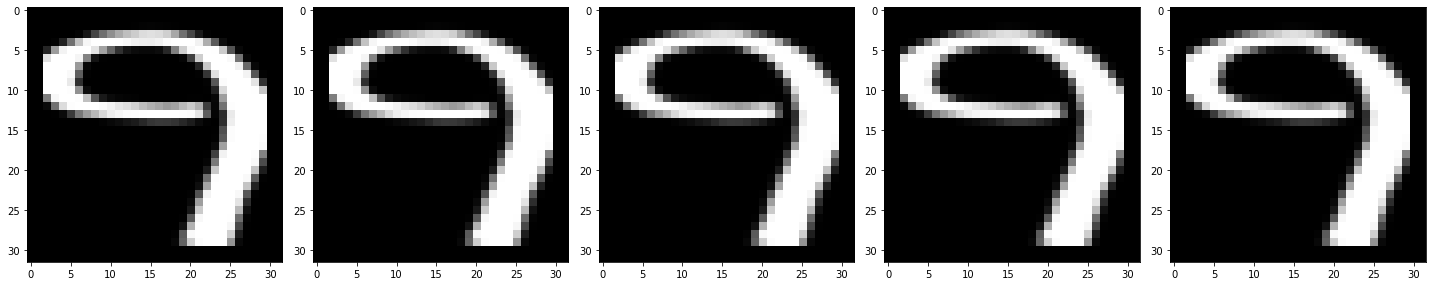

In [50]:
images=[train_data[0][0][0]for i in range(5)]
plotImages(images)

Copying files: 0 files [43:32, ? files/s]


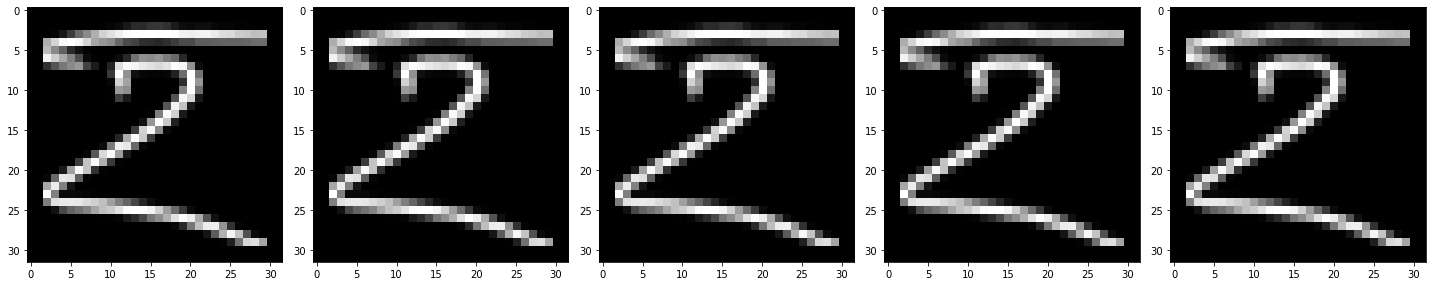

In [51]:
images=[valid_data[0][0][0]for i in range(5)]
plotImages(images)

In [58]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add( tf.keras.layers.Flatten(),)
resnet_model.add(  tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(  tf.keras.layers.Dense(46, activation='softmax'))

In [61]:
resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
model_path="predictor.csv"
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

In [ ]:
resnet_model.fit(train_data,
                      epochs=10,
                      verbose=1,
                      validation_data=valid_data,
                      callbacks=callbacks_list)

Epoch 1/10
1955/1955 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.7398 - ETA: 22s - loss: 0.8671 - accuracy: - ETA: 21s - los - ETA: 16s - loss: 0.8662 - accuracy: 0 - ETA: 15s - loss: 0.86 - ETA: - ETA: 3s - - ETA: 1s - loss: 0.8645 - ac
Epoch 00001: val_accuracy improved from 0.70588 to 0.74789, saving model to predictor.csv
INFO:tensorflow:Assets written to: predictor.csv\assets
1955/1955 [==============================] - 698s 357ms/step - loss: 0.8640 - accuracy: 0.7398 - val_loss: 0.8183 - val_accuracy: 0.7479
Epoch 2/10
 735/1955 [==========>...................] - ETA: 4:29 - loss: 0.7984 - accuracy: 0.7573

In [ ]:
test_image=tf.io.gfile.listdir(r'output/sample_test')
Images=[]
for i in test_image:
    img=tf.keras.preprocessing.image.load_img(r'output/sample_test/'+i,color_mode="rgb",target_size=(32,32))
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=img/255
    Images.append(img)
   

In [ ]:
pred= resnet_model.predict(tf.convert_to_tensor(Images))



In [ ]:
prediction=np.argmax(pred,axis=1)
prediction


In [ ]:

predict=list(map(class_indices.get,prediction))
predict

In [ ]:
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(Images[i], interpolation='none')
    plt.title(" {}".format(predict[i]))
    plt.tight_layout()
    
